In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def convert_to_grid_map(image_path, grid_size=(10, 10), threshold=0.5):
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Binarize the image: set walls and furniture to white (255), empty areas to black (0)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # Get image dimensions
    height, width = binary_image.shape
    
    # Determine grid map size based on grid cell size
    grid_height = height // grid_size[1]
    grid_width = width // grid_size[0]
    grid_map = np.zeros((grid_height, grid_width), dtype=int)

    # Iterate over each grid cell and count the number of black pixels within each cell
    for i in range(grid_height):
        for j in range(grid_width):
            cell = binary_image[i*grid_size[1]:(i+1)*grid_size[1], j*grid_size[0]:(j+1)*grid_size[0]]
            black_pixel_ratio = np.mean(cell == 255)
            if black_pixel_ratio > threshold:
                grid_map[i, j] = 1

    return grid_map

In [38]:
def plot_grid_map(grid_map):
    plt.imshow(grid_map, cmap='gray', origin='upper')
    plt.title("Grid Map")
    plt.xlabel("Grid X")
    plt.ylabel("Grid Y")
    plt.show()

(1068, 1626)


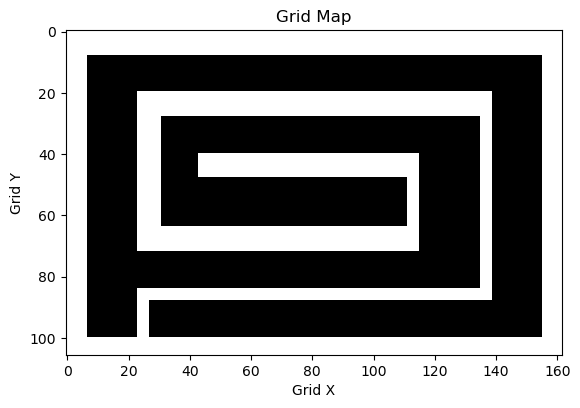

In [ ]:

image_path = " "
grid_size = (10, 10)  # Grid size (width, height)
threshold = 1e-7   # Occupancy threshold

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
print(binary_image.shape)

# Convert to grid map
grid_map = convert_to_grid_map(image_path, grid_size, threshold)

plot_grid_map(grid_map)

In [ ]:
print("Grid Map Matrix:")
print(grid_map)
np.savetxt("grid_map5.txt", grid_map, fmt="%d", delimiter=" ")

Grid Map Matrix:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
